In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# 한글깨질 경우
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [2]:
train = pd.read_csv("./open-2/train.csv")
test = pd.read_csv("./open-2/test.csv")

In [4]:
전체 = pd.concat([train, test], axis=0)

In [74]:
full = pd.concat( [train, test], axis=0 )
pd.DataFrame( full.isnull().sum() ).T

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,0,0,0,0,971,279,18,0,18,20,0,871,0,0,0,0,613


In [76]:
# 전처리
# 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수
full['전용면적'] = full['전용면적'].fillna(full['전용면적'].mean())
full['해당층'] = full['해당층'].fillna(full['해당층'].mode()[0])
full['총층'] =full['총층'].fillna(full['총층'].mode()[0])
full['방수'] = full['방수'].fillna(full['방수'].mode()[0])
full['욕실수'] = full['욕실수'].fillna(full['욕실수'].mode()[0])
full['총주차대수'] = full['총주차대수'].fillna(full['총주차대수'].mean())

In [77]:
# 결측치 다시 확인
pd.DataFrame( full.isnull().sum() ).T

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,613


### 1번 방식의 전처리

In [90]:
full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full['전용면적'] = full['전용면적'].fillna(full['전용면적'].mean())
full['해당층'] = full['해당층'].fillna(full['해당층'].mode()[0])
full['총층'] =full['총층'].fillna(full['총층'].mode()[0])
full['방수'] = full['방수'].fillna(full['방수'].mode()[0])
full['욕실수'] = full['욕실수'].fillna(full['욕실수'].mode()[0])
full['총주차대수'] = full['총주차대수'].fillna(full['총주차대수'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','방향','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 2번 방식의 전처리

In [ ]:
full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','방향','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 3번 방식의 전처리

In [118]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','게재일','ID'], axis=1)

# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

### 4번 방식의 전처리

In [123]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

In [124]:
print(트레인.shape, 테스트.shape)

(2452, 17) (613, 16)


### 5번 방식의 전처리

In [ ]:
mapping = {'북동향': 1,
           '북서향': 3, 
           '남동향': 7, 
           '남향': 6, 
           '북향': 2, 
           '동향': 0, 
           '남서향': 5, 
           '서향': 4,
          }

full = pd.concat( [train, test], axis=0 )

# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
# 전처리 (전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수)
full[['전용면적','해당층','방수','욕실수','총주차대수']] = full[['전용면적','해당층','방수','욕실수','총주차대수']].fillna(0)
full[['총층']] = full[['총층']].fillna(full['총층'].mean())

# 설명변수 추가
full['게재년'] = pd.to_datetime(full['게재일']).dt.year
full['게재월'] = pd.to_datetime(full['게재일']).dt.month

# 게재일 변환
full['게재일'] = pd.to_datetime(full.게재일).apply(lambda x : x.timestamp())

# 필요없는 데이터 삭제 (제공플랫폼, 게재일, ID)
full_dropped = full.drop(['제공플랫폼','ID'], axis=1)



# 인코딩
encoder = LabelEncoder()
cols = ['매물확인방식','주차가능여부','중개사무소']
full_dropped[cols] = full_dropped[cols].apply(encoder.fit_transform)
full_dropped['방향'] = full_dropped.방향.map(mapping)

# 데이터 원복
트레인 = full_dropped[:train.shape[0]]
테스트 = full_dropped[train.shape[0]:].drop(['허위매물여부'], axis=1)

## 전처리 후 여기부터 시작

In [125]:
# 데이터 나누기
x = 트레인.drop(['허위매물여부'], axis=1)
y = 트레인['허위매물여부']

In [126]:
# 전처리 끝났으니 데이터 학습 및 점수확인
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

# (1차 마무리단계)최적모델 찾기
# 평가할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],  # 트리 개수
    'max_depth': [None, 5, 10, 15, 20, 25, 30],  # 트리 최대 깊이
    'min_samples_split': [2, 3, 4, 5, 7, 10],  # 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 4]     # 리프 노드의 최소 샘플 수
}
# 그리드 서치 객체 생성 (교차 검증 5번 진행)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1_macro')

# 그리드 서치를 이용한 학습
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델을 사용한 테스트 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))

# 점수확인
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(macro_f1)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       428
         1.0       0.86      0.76      0.81        63

    accuracy                           0.95       491
   macro avg       0.91      0.87      0.89       491
weighted avg       0.95      0.95      0.95       491

0.8900357361948255


In [ ]:
# 1번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
#               precision    recall  f1-score   support

#          0.0       0.93      0.98      0.96       428
#          1.0       0.82      0.49      0.61        63

#     accuracy                           0.92       491
#    macro avg       0.87      0.74      0.78       491
# weighted avg       0.91      0.92      0.91       491

# 0.784796754363291

# 2번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
#               precision    recall  f1-score   support

#          0.0       0.93      0.98      0.96       428
#          1.0       0.82      0.52      0.64        63

#     accuracy                           0.92       491
#    macro avg       0.88      0.75      0.80       491
# weighted avg       0.92      0.92      0.92       491

# 0.799341705601025

# 3번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
#               precision    recall  f1-score   support

#          0.0       0.92      0.98      0.95       428
#          1.0       0.80      0.44      0.57        63

#     accuracy                           0.91       491
#    macro avg       0.86      0.71      0.76       491
# weighted avg       0.91      0.91      0.90       491

# 0.7619586296056884

# 4번
# Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
# 최적의 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}
#               precision    recall  f1-score   support

#          0.0       0.97      0.98      0.97       428
#          1.0       0.86      0.76      0.81        63

#     accuracy                           0.95       491
#    macro avg       0.91      0.87      0.89       491
# weighted avg       0.95      0.95      0.95       491

# 0.8900357361948255

### 괜찮은 모델 제출해보기

In [128]:
# answer 만들기
for_id = pd.read_csv("./open-2/test.csv")
imsi = best_model.predict(테스트)
imsi = pd.DataFrame(imsi, columns=['허위매물여부'])
answer = pd.concat([for_id[['ID']], imsi], axis=1)
answer.to_csv('25012201.csv', index=False, encoding='utf-8-sig')

100등 -> 64등

In [129]:
# 컬럼확인
full.head(3)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,게재년,게재월
0,TRAIN_0000,현장확인,402500000.0,470000,0.0,0.0,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,1.728432e+09,0.0,2024,10
1,TRAIN_0001,현장확인,170500000.0,200000,0.0,3.0,4.0,남동향,2.0,1.0,불가능,0.0,0,q39iV5J4E6,D플랫폼,1.735171e+09,0.0,2024,12
2,TRAIN_0002,전화확인,114000000.0,380000,0.0,2.0,3.0,동향,1.0,1.0,불가능,0.0,0,b03oE4G3F6,A플랫폼,1.732752e+09,0.0,2024,11


In [135]:
# 데이터 확인
display(train.groupby(['총층'])['전용면적'].describe())
display(train.groupby(['총층'])['총주차대수'].describe())

,count,mean,std,min,25%,50%,75%,max
총층,,,,,,,,
2.0,38.0,27.715263,7.631306,17.5,20.5600,27.405,32.6825,44.29
3.0,129.0,29.866977,8.094055,17.5,23.1400,29.500,35.7100,48.95
4.0,106.0,26.740472,8.559897,17.5,19.8075,25.105,31.6700,49.60
5.0,122.0,28.784016,9.088494,17.5,21.2650,27.530,35.3800,49.60
6.0,222.0,28.712838,9.142776,17.5,19.8300,28.650,37.5225,49.97
7.0,166.0,26.438976,6.759603,17.5,19.8500,26.250,29.9200,43.54
8.0,105.0,26.331238,7.560575,17.5,19.8100,25.560,31.1300,42.97
9.0,119.0,27.856134,7.134012,17.5,22.2250,29.360,32.9150,41.65
10.0,95.0,26.174211,6.091498,17.5,24.0100,25.560,29.7650,44.33


,count,mean,std,min,25%,50%,75%,max
총층,,,,,,,,
2.0,37.0,21.459459,13.659743,1.0,10.00,18.0,33.00,45.0
3.0,77.0,12.155844,15.160601,1.0,1.00,2.0,22.00,45.0
4.0,151.0,9.298013,14.508294,1.0,1.00,2.0,5.00,49.0
5.0,171.0,12.058480,45.965551,1.0,2.00,5.0,7.00,590.0
6.0,247.0,10.469636,11.807315,1.0,4.00,6.0,11.00,50.0
7.0,170.0,10.964706,11.906884,1.0,4.00,6.0,14.50,50.0
8.0,115.0,11.391304,13.705355,1.0,4.00,6.0,8.50,50.0
9.0,124.0,22.677419,40.108704,1.0,7.00,10.0,28.00,260.0
10.0,99.0,21.373737,14.369459,1.0,8.00,18.0,34.00,50.0


<Axes: xlabel='총층', ylabel='전용면적'>

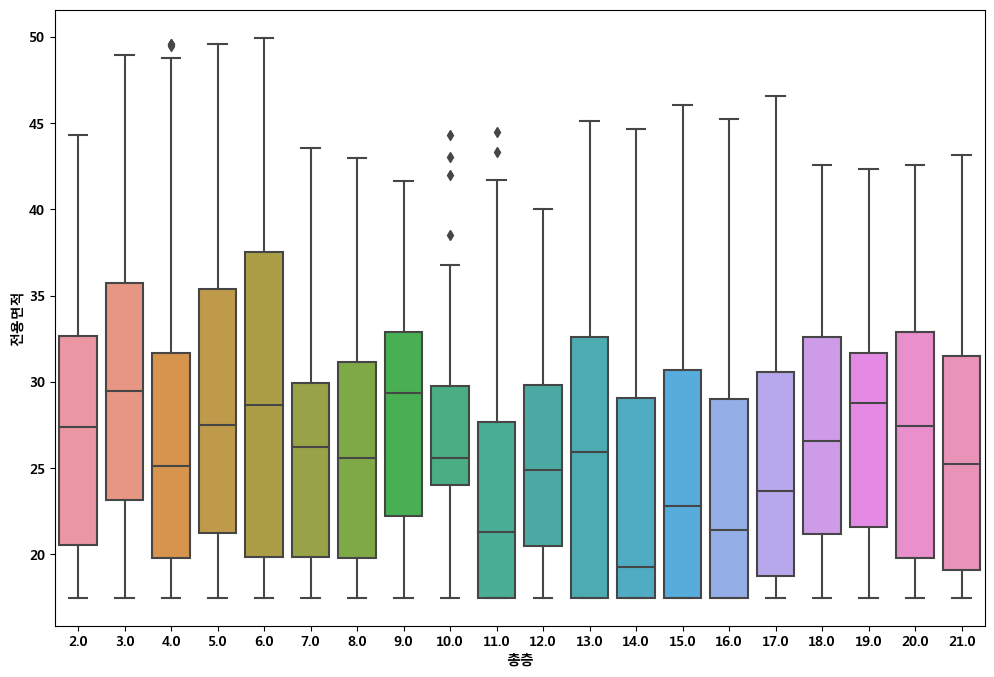

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(data = train, x='총층', y='전용면적')

In [142]:
# 보증금이 높으면 월세가 낮음, 보증금이 낮으면 월세가 높음 
# 이를 이용해서 등급을 매기고 등급에 따른 전용면적 차이를 알아보자
# 보증금과 월세를 등급을 매기고 그에 따른 합산 등급을 또 만든다. -> 이러한 설명변수를 추가해보자